In [14]:
#所需包
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [37]:
#导入需要的数据
iris = datasets.load_iris()
# print(iris.keys())
print(iris.feature_names)
# print(iris.target_names)
X = iris.data
y = iris.target
# print(y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


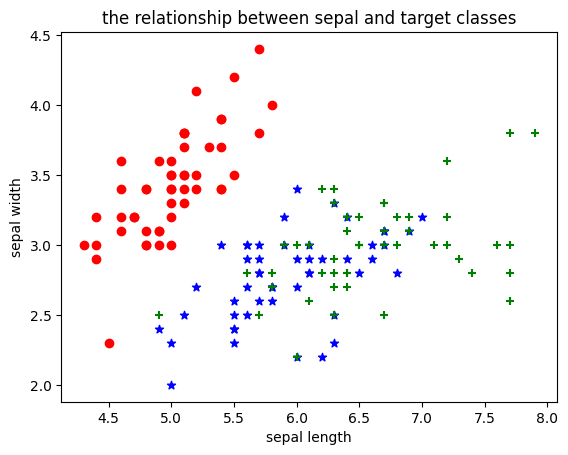

In [39]:
#数据前两个是花萼长度
X = iris.data[:,:2]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between sepal and target classes')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

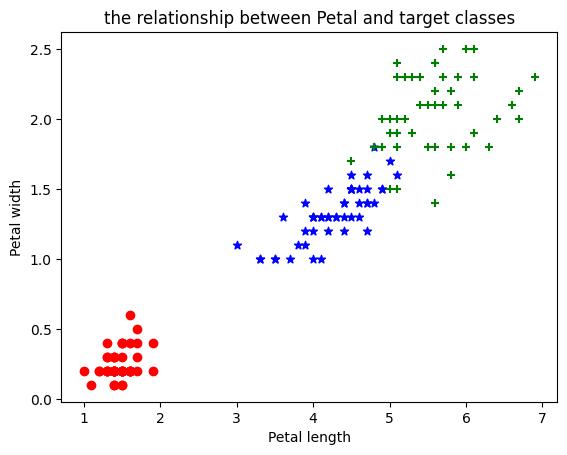

In [38]:
#数据后两个是花瓣长度
X = iris.data[:,2:]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between Petal and target classes')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.2, random_state=0)
lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
print(lin_svc)
print(rbf_svc)
print(poly_svc)

SVC(kernel='linear')
SVC()
SVC(kernel='poly')


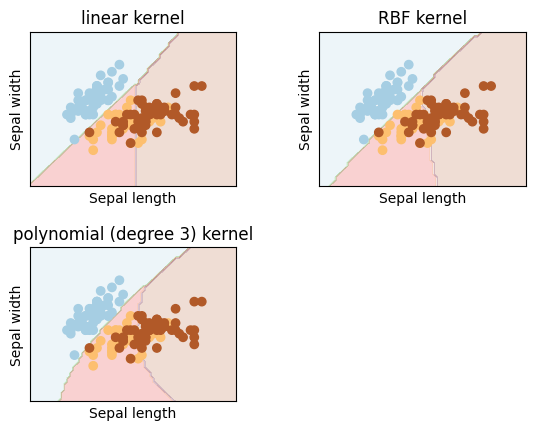

In [61]:
#学习率
h = .08
#刻度上下限
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

titles = ['linear kernel', 'RBF kernel', 'polynomial (degree 3) kernel']

for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2,2, i + 1) 
    # 画布间距
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [62]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)

rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)

poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)

print(acc_lin_svc)
print(acc_rbf_svc)
print(acc_poly_svc)

0.7333333333333333
0.7333333333333333
0.7333333333333333


In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,2:], iris.target, test_size=0.3, random_state=0)
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
# print(X_train)

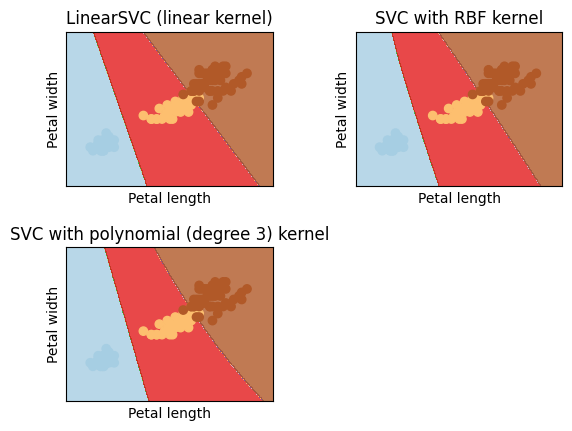

In [28]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate(( lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [29]:
lin_svc_pre = lin_svc.predict(X_test)
acc_lin_svc = sum(lin_svc_pre==y_test)/len(y_test)
rbf_svc_pre = rbf_svc.predict(X_test)
acc_rbf_svc = sum(rbf_svc_pre==y_test)/len(y_test)
poly_svc_pre = poly_svc.predict(X_test)
acc_poly_svc = sum(poly_svc_pre==y_test)/len(y_test)
print(acc_lin_svc)
print(acc_rbf_svc)
print(acc_poly_svc)

0.9777777777777777
0.9777777777777777
0.9777777777777777
